In [1]:
from keras.utils import set_random_seed
from keras import Sequential
from keras.layers import Conv2D

from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
set_random_seed(11)

In [33]:
from keras.models import load_model
x_train=np.load('x_train1.npy').reshape(-1,150,150,1)
x_test=np.load('x_test1.npy').reshape(-1,150,150,1)
x_val=np.load('x_val1.npy').reshape(-1,150,150,1)
y_train=np.load('y_train.npy')
y_test=np.load('y_test.npy')
y_val=np.load('y_val.npy')

In [34]:
def createModel(n_node):
    
    model=Sequential()
    
    # 입력
    model.add(Conv2D(n_node, kernel_size=3, padding='same', input_shape=(150,150,1)))
    
    
    model.add(Conv2D(50, kernel_size=3, padding='same'))
    
    
    # 출력
    model.add(Conv2D(3,kernel_size=3, padding='same', activation='sigmoid'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [35]:
# 메모리 에러남
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

model=createModel(50)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 150, 150, 50)      500       
                                                                 
 conv2d_10 (Conv2D)          (None, 150, 150, 50)      22550     
                                                                 
 conv2d_11 (Conv2D)          (None, 150, 150, 3)       1353      
                                                                 
Total params: 24,403
Trainable params: 24,403
Non-trainable params: 0
_________________________________________________________________


In [36]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# 검증 데이터에 대한 loss값 2번 연속 개선되지 않으면 학습 중지
stopCB=EarlyStopping(monitor='val_loss', patience=3)

In [50]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), callbacks=[stopCB])

Epoch 1/10
167/167 [==============================] - 343s 2s/step - loss: 0.0083 - val_loss: 0.1349
Epoch 2/10
167/167 [==============================] - 356s 2s/step - loss: 0.0082 - val_loss: 0.1378
Epoch 3/10
167/167 [==============================] - 353s 2s/step - loss: 0.0082 - val_loss: 0.1328
Epoch 4/10
167/167 [==============================] - 358s 2s/step - loss: 0.0082 - val_loss: 0.1348
Epoch 5/10
167/167 [==============================] - 354s 2s/step - loss: 0.0082 - val_loss: 0.1343
Epoch 6/10
167/167 [==============================] - 359s 2s/step - loss: 0.0082 - val_loss: 0.1362


In [51]:
x_test[100]

array([[[0.14137856],
        [0.10496784],
        [0.07597464],
        ...,
        [0.04189176],
        [0.09386261],
        [0.09033869]],

       [[0.13173765],
        [0.14249216],
        [0.12779425],
        ...,
        [0.09799516],
        [0.0860366 ],
        [0.10867987]],

       [[0.16893137],
        [0.11643987],
        [0.17791608],
        ...,
        [0.13098222],
        [0.10852654],
        [0.10962824]],

       ...,

       [[0.1500149 ],
        [0.11144954],
        [0.08553961],
        ...,
        [0.21866026],
        [0.13566314],
        [0.19218693]],

       [[0.1360783 ],
        [0.14764235],
        [0.11262157],
        ...,
        [0.09012144],
        [0.0902    ],
        [0.19865987]],

       [[0.18835464],
        [0.08824641],
        [0.0940366 ],
        ...,
        [0.07824301],
        [0.22987216],
        [0.14901386]]])

5/5 [==============================] - 0s 7ms/step


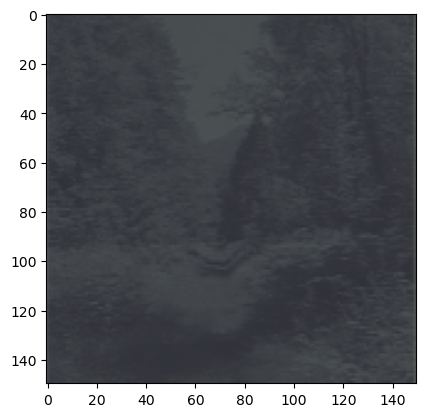

In [53]:
pre_out=model.predict(x_test[100]).reshape(150,150,3)
plt.imshow(pre_out.reshape(150,150,3))
plt.show()

In [54]:
pre_out

array([[[0.28737494, 0.29740858, 0.3431119 ],
        [0.22673377, 0.23645738, 0.26303348],
        [0.21301027, 0.22008364, 0.24518208],
        ...,
        [0.21333992, 0.22263117, 0.24582867],
        [0.22516759, 0.23358737, 0.25802416],
        [0.29580247, 0.30172265, 0.30309895]],

       [[0.28989646, 0.29985467, 0.34498718],
        [0.23871551, 0.24920559, 0.27282214],
        [0.2275448 , 0.23779461, 0.25935617],
        ...,
        [0.2229942 , 0.2328476 , 0.2564604 ],
        [0.22686486, 0.23662412, 0.25890285],
        [0.2979889 , 0.30364168, 0.30607018]],

       [[0.29623803, 0.3064805 , 0.35046908],
        [0.23753786, 0.2486561 , 0.2715276 ],
        [0.23906972, 0.24999313, 0.27049392],
        ...,
        [0.23276094, 0.24420322, 0.26432377],
        [0.23338088, 0.24388766, 0.26531678],
        [0.29941875, 0.30557343, 0.30790928]],

       ...,

       [[0.2897312 , 0.30009758, 0.34555352],
        [0.23026288, 0.240029  , 0.2654682 ],
        [0.21738462, 0

In [95]:
def test_plt(model, i):
    plt.figure(figsize=(20,5))

    plt.subplot(131)
    plt.imshow(x_test[i].reshape(150,150,1), cmap='gray')
    plt.xticks([], [])
    plt.yticks([], [])

    plt.subplot(132)
    pre_out=model.predict(x_test[i]).reshape(150,150,3)
    plt.imshow(pre_out.reshape(150,150,3)*[1.2,1.2,1.2])
    plt.xticks([], [])
    plt.yticks([], [])

    plt.subplot(133)
    plt.imshow(y_test[i])
    plt.xticks([], [])
    plt.yticks([], [])

    plt.tight_layout()
    plt.show()

5/5 [==============================] - 0s 8ms/step


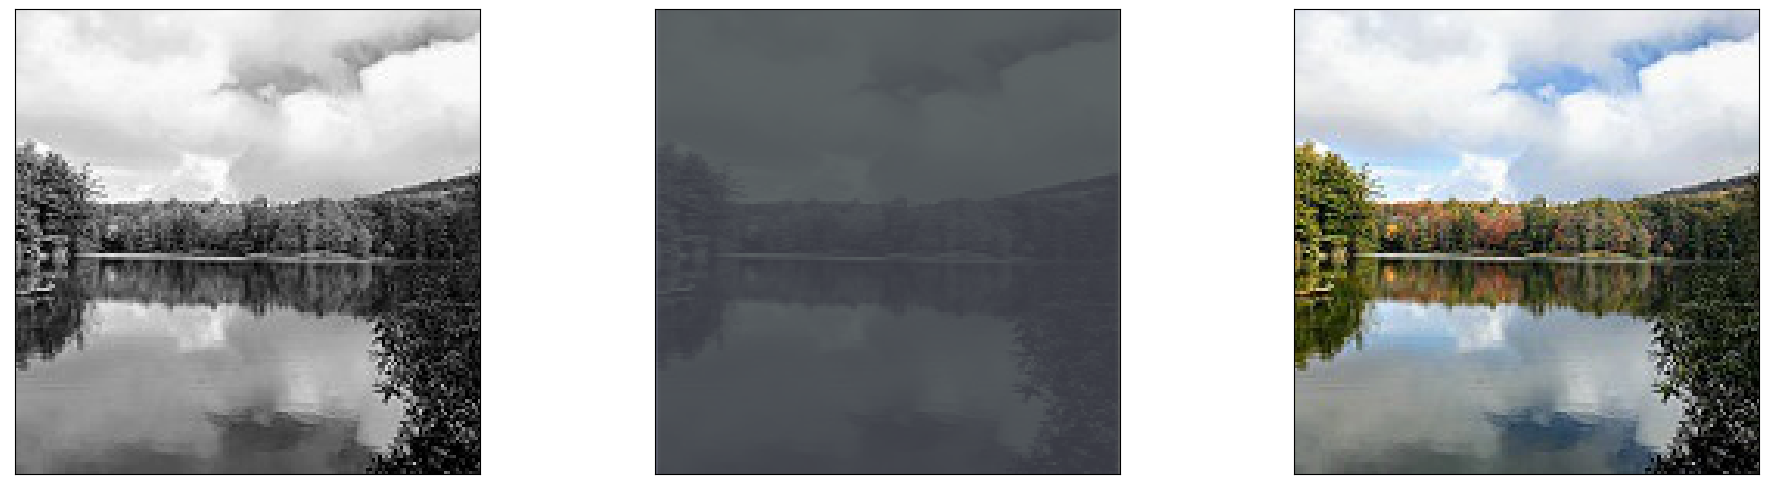

In [96]:
test_plt(model,150)

In [94]:
22500/150

150.0